# Monkey Vision

### Data Import and Analysis

In [1]:
import pandas as pd
import random
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Image
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
%matplotlib inline

In [2]:
IMG_SIZE=224

In [3]:
Monkey_Names=['mantled_howler','patas_monkey','bald_uakari','japanese_macaque','pygmy_marmoset',
              'white_headed_capuchin','silvery_marmoset','common_squirrel_monkey','black_headed_night_monkey',
              'nilgiri_langur']

In [4]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [5]:
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [6]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [7]:
def Filenames_Import(dir_path):
  data = []
  for filename in os.listdir(dir_path):
        # Your code comes here such as 
        data.append(dir_path+'/'+filename)
  return data

In [8]:
dir_paths=[]
for i in range(0,10):
  dir_paths.append('/content/drive/MyDrive/Monkey_Vision/n'+str(i))

In [9]:
monkey_links=[]
for i in dir_paths:
  monkey_links.append(Filenames_Import(i))

In [10]:
Links_df=pd.DataFrame()

In [11]:
monkeys=[]
for i in range(len(monkey_links)):
  for ii in range(len(monkey_links[i])):
    monkeys.append(Monkey_Names[i])

In [12]:
links=[]
for i in range(len(monkey_links)):
  for ii in range(len(monkey_links[i])):
    links.append(monkey_links[i][ii])

In [13]:
Links_df["Image_Links"]=links

In [14]:
Links_df["Target"]=monkeys

In [15]:
Links_df

,Image_Links,Target
0,/content/drive/MyDrive/Monkey_Vision/n0/n0019.jpg,mantled_howler
1,/content/drive/MyDrive/Monkey_Vision/n0/n0024.jpg,mantled_howler
2,/content/drive/MyDrive/Monkey_Vision/n0/n0021.jpg,mantled_howler
3,/content/drive/MyDrive/Monkey_Vision/n0/n0023.jpg,mantled_howler
4,/content/drive/MyDrive/Monkey_Vision/n0/n0018.jpg,mantled_howler
...,...,...
1093,/content/drive/MyDrive/Monkey_Vision/n9/n9156.jpg,nilgiri_langur
1094,/content/drive/MyDrive/Monkey_Vision/n9/n9158.jpg,nilgiri_langur
1095,/content/drive/MyDrive/Monkey_Vision/n9/n9163.jpg,nilgiri_langur
1096,/content/drive/MyDrive/Monkey_Vision/n9/n917.jpg,nilgiri_langur


In [16]:
Images=[]
for i in Links_df['Image_Links']:
  Images.append(process_image(i))

In [17]:
monkey_df=pd.DataFrame()

In [18]:
monkey_df["Images"]=Images
monkey_df["target"]=monkeys

In [19]:
monkey_df.sample(frac=1)
monkey_df["target"] = pd.Categorical(monkey_df["target"])
monkey_df["target"]=monkey_df["target"].astype('category').cat.codes

In [20]:
X_train=links
y_train=np.array(monkey_df["target"])
new=[]
for i in y_train:
  temp=[]
  for ii in range(len(Monkey_Names)):
    if ii==i:
      temp.append(1)
    else:
      temp.append(0)
  new.append(temp)
y_train=np.array([np.array(xi) for xi in new])
print(monkey_df["target"][0])
print(y_train[0])

4
[0 0 0 0 1 0 0 0 0 0]


In [21]:
def show_25_images(df,names):
  plt.figure(figsize=(14,14))
  for i in range(25):
    j=random.randint(0,len(df))
    ax=plt.subplot(5,5,i+1)
    plt.imshow(df["Images"][j])
    plt.title(names[j])
    plt.axis("off")

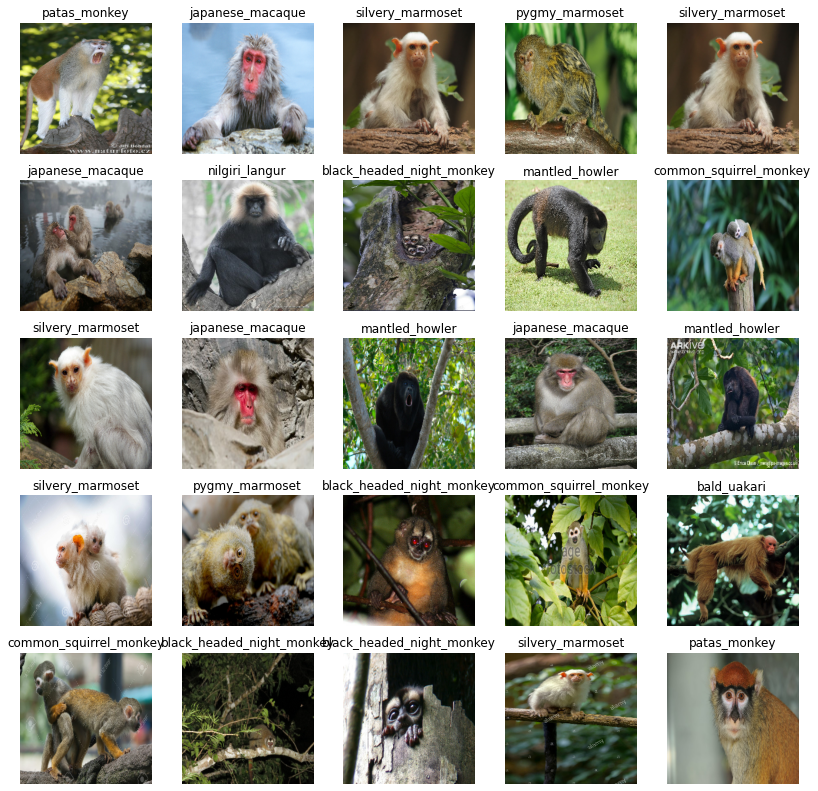

In [22]:
show_25_images(monkey_df,monkeys)

In [23]:
dir_paths=[]
for i in range(0,10):
  dir_paths.append('/content/drive/MyDrive/Monkey_Vision/Monkey_Val/n'+str(i))
monkey_links=[]
for i in dir_paths:
  monkey_links.append(Filenames_Import(i))
Links_df=pd.DataFrame()
monkeys=[]
for i in range(len(monkey_links)):
  for ii in range(len(monkey_links[i])):
    monkeys.append(Monkey_Names[i])
links=[]
for i in range(len(monkey_links)):
  for ii in range(len(monkey_links[i])):
    links.append(monkey_links[i][ii])
Links_df["Image_Links"]=links
Links_df["Target"]=monkeys
Images=[]
for i in Links_df['Image_Links']:
  Images.append(process_image(i))
val_df=pd.DataFrame()
val_df["Images"]=Images
val_df["target"]=monkeys
val_df.sample(frac=1)
val_df["target"] = pd.Categorical(val_df["target"])
val_df["target"]=val_df["target"].astype('category').cat.codes

In [24]:
X_val=links
y_val=np.array(val_df["target"])
new=[]
for i in y_val:
  temp=[]
  for ii in range(len(Monkey_Names)):
    if ii==i:
      temp.append(1)
    else:
      temp.append(0)
  new.append(temp)
y_val=np.array([np.array(xi) for xi in new])
print(val_df["target"][0])
print(y_val[0])

4
[0 0 0 0 1 0 0 0 0 0]


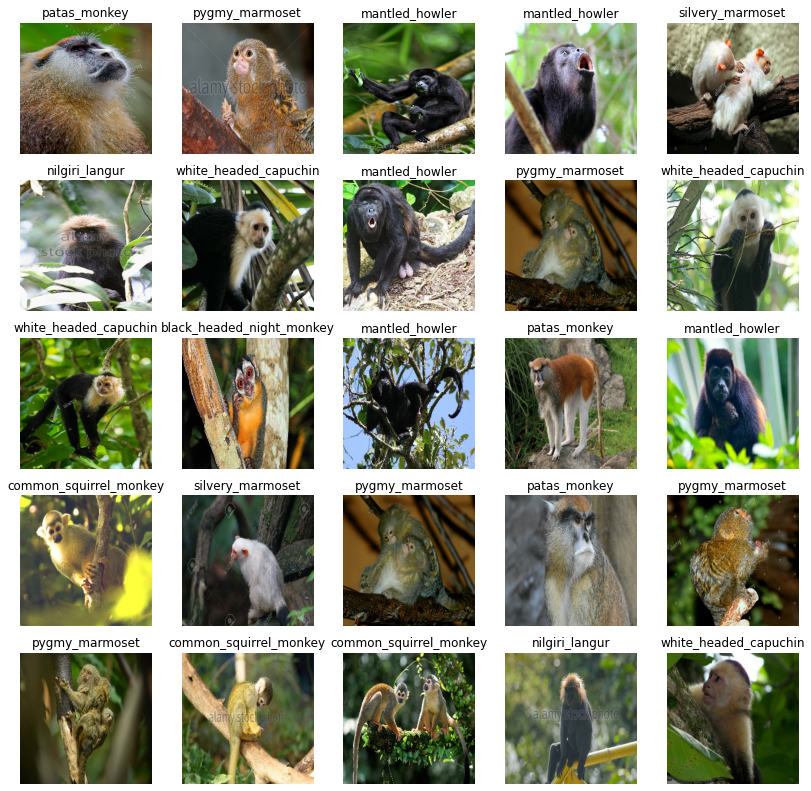

In [25]:
show_25_images(val_df,monkeys)

## Creating the Model

### Transfer Learning

In [26]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [27]:
len(Monkey_Names)

10

In [28]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(Monkey_Names)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [29]:
def train_model():
  model=create_model()
  tensorboard=create_tensorboard_callback()
  hist=model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  return model

In [30]:
%load_ext tensorboard

In [31]:
import datetime

def create_tensorboard_callback():
  logdir=os.path.join("/content/drive/MyDrive/Dog_Vision_Data /logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [32]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [33]:
vals=[]
for i,j in monkey_df["Images"].items():
  vals.append(tf.constant(j))
monkey_df["Images"]=vals
vals=[]
for i,j in val_df["Images"].items():
  vals.append(tf.constant(j))
val_df["Images"]=vals

In [34]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [35]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 10)                10020     
                                                                 
Total params: 5,442,733
Trainable params: 10,020
Non-trainable params: 5,432,713
_________________________________________________________________


In [36]:
NUM_EPOCHS=20

In [37]:
print(train_data)
print(val_data)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))>


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/20
35/35 [==============================] - 88s 2s/step - loss: 0.8300 - accuracy: 0.7668 - val_loss: 0.1469 - val_accuracy: 0.9743
Epoch 2/20
35/35 [==============================] - 83s 2s/step - loss: 0.0944 - accuracy: 0.9809 - val_loss: 0.0753 - val_accuracy: 0.9816
Epoch 3/20
35/35 [==============================] - 79s 2s/step - loss: 0.0509 - accuracy: 0.9964 - val_loss: 0.0598 - val_accuracy: 0.9853
Epoch 4/20
35/35 [==============================] - 82s 2s/step - loss: 0.0325 - accuracy: 0.9982 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 5/20
35/35 [==============================] - 82s 2s/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9853
Epoch 6/20
35/35 [==============================] - 86s 2s/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9853


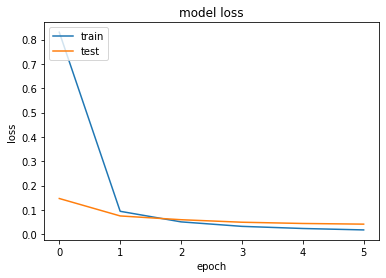

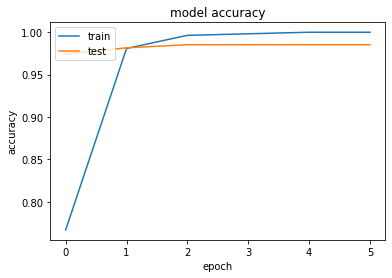

In [38]:
model=train_model()

## Convolutional Neural Network

In [39]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),   
    tf.keras.layers.Conv2D(10,3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [40]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=20,steps_per_epoch=len(train_data), validation_data=val_data,validation_steps=len(val_data) )

Epoch 1/20
35/35 [==============================] - 101s 3s/step - loss: 2.2085 - accuracy: 0.1949 - val_loss: 1.8987 - val_accuracy: 0.3934
Epoch 2/20
35/35 [==============================] - 99s 3s/step - loss: 1.5297 - accuracy: 0.4845 - val_loss: 1.4440 - val_accuracy: 0.4779
Epoch 3/20
35/35 [==============================] - 104s 3s/step - loss: 1.1225 - accuracy: 0.6302 - val_loss: 1.4159 - val_accuracy: 0.5110
Epoch 4/20
35/35 [==============================] - 100s 3s/step - loss: 0.8964 - accuracy: 0.7122 - val_loss: 1.3661 - val_accuracy: 0.5515
Epoch 5/20
35/35 [==============================] - 98s 3s/step - loss: 0.6166 - accuracy: 0.8033 - val_loss: 1.5630 - val_accuracy: 0.5478
Epoch 6/20
35/35 [==============================] - 99s 3s/step - loss: 0.3536 - accuracy: 0.8916 - val_loss: 1.3931 - val_accuracy: 0.5993
Epoch 7/20
35/35 [==============================] - 100s 3s/step - loss: 0.1624 - accuracy: 0.9581 - val_loss: 1.5075 - val_accuracy: 0.5919
Epoch 8/20
35/35

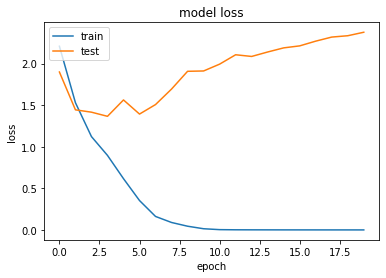

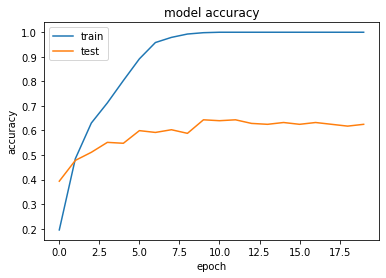

In [41]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),   
    tf.keras.layers.Conv2D(10,3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [48]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=20,steps_per_epoch=len(train_data), validation_data=val_data,validation_steps=len(val_data) )

Epoch 1/20
35/35 [==============================] - 99s 3s/step - loss: 2.2059 - accuracy: 0.1785 - val_loss: 1.9565 - val_accuracy: 0.3750
Epoch 2/20
35/35 [==============================] - 93s 3s/step - loss: 1.6796 - accuracy: 0.4590 - val_loss: 1.5128 - val_accuracy: 0.4890
Epoch 3/20
35/35 [==============================] - 93s 3s/step - loss: 1.3053 - accuracy: 0.5719 - val_loss: 1.4853 - val_accuracy: 0.4706
Epoch 4/20
35/35 [==============================] - 94s 3s/step - loss: 1.0620 - accuracy: 0.6503 - val_loss: 1.3485 - val_accuracy: 0.5368
Epoch 5/20
35/35 [==============================] - 95s 3s/step - loss: 0.8702 - accuracy: 0.7268 - val_loss: 1.3256 - val_accuracy: 0.5551
Epoch 6/20
35/35 [==============================] - 94s 3s/step - loss: 0.6409 - accuracy: 0.7969 - val_loss: 1.2547 - val_accuracy: 0.5993
Epoch 7/20
35/35 [==============================] - 94s 3s/step - loss: 0.5257 - accuracy: 0.8260 - val_loss: 1.2890 - val_accuracy: 0.5882
Epoch 8/20
35/35 [==

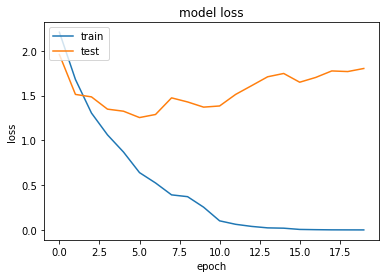

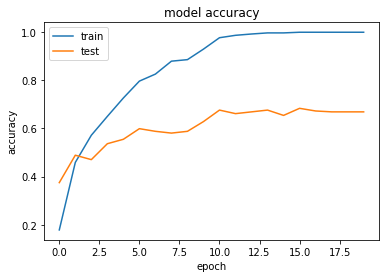

In [49]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()